In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.api as sm
import seaborn as sns

In [16]:
#load data
df = pd.read_csv("coursework_1_data_2019.csv")
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [17]:
#create proportion of cases for all years and genders
years = [2008, 2013, 2018]
genders = ['total', 'male', 'female']

for gender in genders:
    for year in years:
        df['cases_' + gender + '_prop_'+str(year)] = df[str(year)+'_cases_' + gender]/(df[str(year)+'_pop_'+gender]/100000)        

In [18]:
#create proportion of females and its change 2008 - 2018
for year in years:
    df['female_prop_' + str(year)] = df[str(year) + '_pop_female'] / df[str(year) + '_pop_total']
    
df['female_prop_change'] = df['female_prop_2018'] - df['female_prop_2008']

In [19]:
#create budgets per person
budgets = ['total_budget', 'clean_air', 'clean_environ', 'health_training', 
           'school_awareness', 'media_awareness', 'sub_counselling']

for budget in budgets:
    df[budget + '_pp'] = df[budget] / df['2008_pop_total']
    
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,female_prop_2013,female_prop_2018,female_prop_change,total_budget_pp,clean_air_pp,clean_environ_pp,health_training_pp,school_awareness_pp,media_awareness_pp,sub_counselling_pp
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,0.542451,0.571001,0.056802,0.804939,0.121609,0.127400,0.104237,0.237428,0.104237,0.110028
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,0.530512,0.545535,0.042135,0.646232,0.146871,0.049936,0.067561,0.217369,0.088123,0.076373
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,0.519339,0.507315,-0.005886,0.705607,0.180812,0.198452,0.022050,0.114661,0.127891,0.061741
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,0.513936,0.519949,0.007148,0.901330,0.184745,0.235129,0.106368,0.279916,0.055983,0.039188
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,0.483796,0.515385,-0.004614,0.821823,0.233903,0.328729,0.107469,0.050574,0.018965,0.082182


In [20]:
#descriptive statistics

for year in years:
    minimum = df['cases_total_prop_' + str(year)].min()
    percentile_25 = np.percentile(df['cases_total_prop_' + str(year)], 25)
    median = df['cases_total_prop_' + str(year)].median()
    mean = df['cases_total_prop_' + str(year)].mean()
    percentile_75 = np.percentile(df['cases_total_prop_' + str(year)], 75)
    maximum = df['cases_total_prop_' + str(year)].max()
    iqr = percentile_75 - percentile_25
    sd = np.std(df['cases_total_prop_' + str(year)])
    outliers_lower = minimum < (percentile_25 - (iqr * 1.5))
    outliers_upper = maximum > (percentile_75 + (iqr * 1.5))
    
    print(str(year))
    print('min: ' + str(round(minimum, 2)))
    print('25th percentile: ' + str(round(percentile_25, 2)))
    print('median: ' + str(round(median, 2)))
    print('mean: ' + str(round(mean, 2)))
    print('75th percentile: ' + str(round(percentile_75, 2)))
    print('max: ' + str(round(maximum, 2)))
    print('IQR: ' + str(round(iqr, 2)))
    print('standard deviation: ' + str(round(sd, 2)))
    print('outliers below: ' + str(outliers_lower))
    print('outliers above: ' + str(outliers_upper))


2008
min: 74.0
25th percentile: 214.84
median: 291.45
mean: 309.73
75th percentile: 365.03
max: 824.13
IQR: 150.19
standard deviation: 136.61
outliers below: False
outliers above: True
2013
min: 41.93
25th percentile: 226.89
median: 298.48
mean: 320.98
75th percentile: 381.07
max: 849.61
IQR: 154.18
standard deviation: 138.64
outliers below: False
outliers above: True
2018
min: 101.39
25th percentile: 253.54
median: 318.21
mean: 344.67
75th percentile: 406.7
max: 872.88
IQR: 153.16
standard deviation: 138.26
outliers below: False
outliers above: True


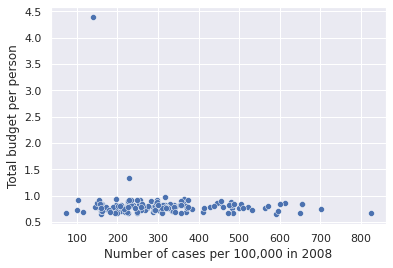

In [21]:
#is spending related to prevalence in the beginning?

#figure 1a
sns.set_theme()
scatter = sns.scatterplot(data=df, x = 'cases_total_prop_2008', y = 'total_budget_pp')
scatter.set(xlabel='Number of cases per 100,000 in 2008', ylabel='Total budget per person')
plt.show()

fig = scatter.get_figure()
fig.savefig('figures/figure_1a.png')


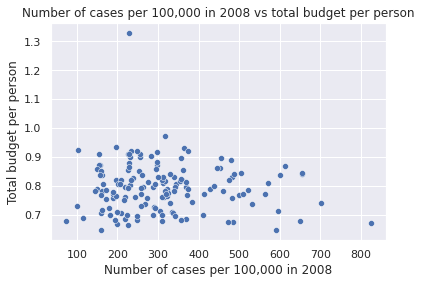

In [27]:
#figure 1b
#filtering out City of London
df = df.loc[df['local_authority_area'] != 'City of London']

sns.set_theme()
scatter = sns.scatterplot(data=df, x = 'cases_total_prop_2008', y = 'total_budget_pp')
scatter.set(xlabel='Number of cases per 100,000 in 2008', ylabel='Total budget per person', 
            title = 'Number of cases per 100,000 in 2008 vs total budget per person')
plt.show()

fig = scatter.get_figure()
fig.savefig('figures/figure_1b.png')


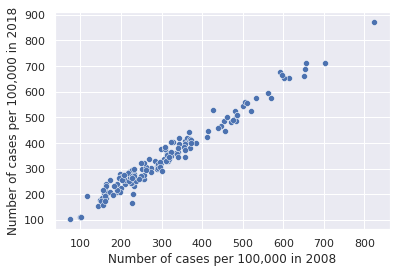

In [23]:
#figure 2
sns.set_theme()
scatter = sns.scatterplot(data=df, x = 'cases_total_prop_2008', y = 'cases_total_prop_2018')
scatter.set(xlabel='Number of cases per 100,000 in 2008', ylabel='Number of cases per 100,000 in 2018')
plt.show()

fig = scatter.get_figure()
fig.savefig('figures/figure_2.png')


In [24]:
#fitting a multiple regression model
predictors = ['cases_total_prop_2008', 'female_prop_change']
predictors += [col for col in df if col.endswith('pp')]

model = sm.OLS(endog=df[['cases_total_prop_2018']], exog=sm.add_constant(df[predictors])).fit()
model.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     cases_total_prop_2018   R-squared:                       0.983
Model:                               OLS   Adj. R-squared:                  0.982
Method:                    Least Squares   F-statistic:                     1010.
Date:                   Mon, 15 Nov 2021   Prob (F-statistic):          4.27e-121
Time:                           15:51:40   Log-Likelihood:                -651.58
No. Observations:                    151   AIC:                             1321.
Df Residuals:                        142   BIC:                             1348.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    61.6162     15.465      3.984      0.000      31.046      92.187
cases_total_prop_2008     0.9945      0.011     88.022      0.000       0.972       1.017
female_prop_change      480.2027     55.134      8.710      0.000     371.213     589.192
total_budget_pp         -21.4954     16.824     -1.278      0.203     -54.753      11.762
clean_air_pp            -26.6858     20.755     -1.286      0.201     -67.715      14.343
clean_environ_pp        -21.4054     19.334     -1.107      0.270     -59.624      16.813
health_training_pp      -52.2263     39.526     -1.321      0.189    -130.361      25.909
school_awareness_pp     -72.0710     17.605     -4.094      0.000    -106.873     -37.269
media_awareness_pp      100.1211     32.882      3.045      0.003      35.120     165.123
sub_counselling_pp       50.7720     51.315      0.989      0.324     -50.668     152.212
==============================================================================
Omnibus:                        3.248   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                2.343
Skew:                           0.137   Prob(JB):                        0.310
Kurtosis:                       2.455   Cond. No.                     8.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

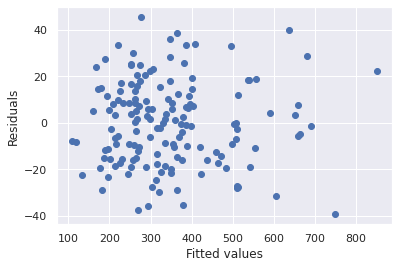

In [25]:
#resuiduals vs fitted plot (figure 3)
# plot 
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.savefig('figures/figure_3.png')
plt.show()
